### 4.1 Preparatory code from module 3

In [12]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [14]:
df = pd.read_csv('03-classification-data.csv')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.churn = (df.churn == 'yes').astype(int)

In [15]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

In [16]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [17]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [18]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [19]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]

In [20]:
small_subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[small_subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [21]:
val_dict_small = df_val[small_subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)

y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

In [23]:
y_pred = model.predict_proba(X_val)[:, 1]
churn = y_pred >= 0.5
(churn == y_val).mean()

np.float64(0.8016129032258065)

### 4.2 Accuracy and dummy model

In [24]:
# How many customers
len(y_val)

1860

In [25]:
# How many decisions are correct
(churn == y_val).sum()

np.int64(1491)

Accuracy = # of correct predictions / # of all customers

In [28]:
thresholds = np.linspace(0, 1, 21)
thresholds

scores = []

# Evaluating predictions for various thresholds
for t in thresholds:
    churn = (y_pred >= t)
    score = (churn == y_val).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)

scores

0.00 0.261
0.05 0.501
0.10 0.595
0.15 0.640
0.20 0.690
0.25 0.730
0.30 0.755
0.35 0.767
0.40 0.782
0.45 0.795
0.50 0.802
0.55 0.790
0.60 0.790
0.65 0.788
0.70 0.774
0.75 0.752
0.80 0.742
0.85 0.739
0.90 0.739
0.95 0.739
1.00 0.739


[np.float64(0.26129032258064516),
 np.float64(0.5010752688172043),
 np.float64(0.5946236559139785),
 np.float64(0.6403225806451613),
 np.float64(0.6897849462365592),
 np.float64(0.7295698924731183),
 np.float64(0.7548387096774194),
 np.float64(0.7672043010752688),
 np.float64(0.7817204301075269),
 np.float64(0.7951612903225806),
 np.float64(0.8016129032258065),
 np.float64(0.7903225806451613),
 np.float64(0.7897849462365591),
 np.float64(0.7881720430107527),
 np.float64(0.7736559139784946),
 np.float64(0.7521505376344086),
 np.float64(0.7419354838709677),
 np.float64(0.7387096774193549),
 np.float64(0.7387096774193549),
 np.float64(0.7387096774193549),
 np.float64(0.7387096774193549)]

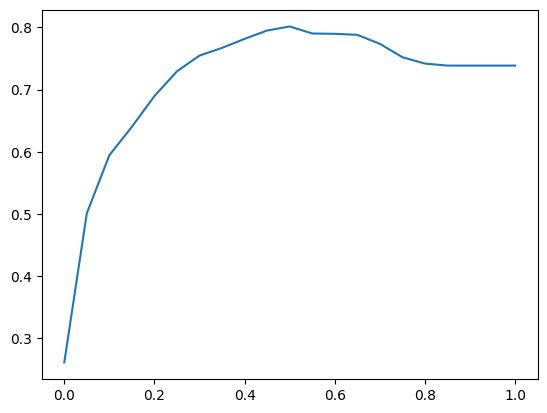

In [29]:
# Plot scores
plt.plot(thresholds, scores)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
# using built-in function
accuracy_score(y_val, y_pred >= 0.5)

0.8016129032258065

In [33]:
scores = []

# Evaluating predictions for various thresholds using the built-in functions
for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

scores

0.00 0.261
0.05 0.501
0.10 0.595
0.15 0.640
0.20 0.690
0.25 0.730
0.30 0.755
0.35 0.767
0.40 0.782
0.45 0.795
0.50 0.802
0.55 0.790
0.60 0.790
0.65 0.788
0.70 0.774
0.75 0.752
0.80 0.742
0.85 0.739
0.90 0.739
0.95 0.739
1.00 0.739


[0.26129032258064516,
 0.5010752688172043,
 0.5946236559139785,
 0.6403225806451613,
 0.6897849462365592,
 0.7295698924731183,
 0.7548387096774194,
 0.7672043010752688,
 0.7817204301075269,
 0.7951612903225806,
 0.8016129032258065,
 0.7903225806451613,
 0.7897849462365591,
 0.7881720430107527,
 0.7736559139784946,
 0.7521505376344086,
 0.7419354838709677,
 0.7387096774193549,
 0.7387096774193549,
 0.7387096774193549,
 0.7387096774193549]

In [36]:
# If threshold is 1.0, customers are supposed to never churn. Does it happen?
from collections import Counter
Counter(y_pred >= 1.0)

Counter({np.False_: 1860})

Accuracy does not tell us how good the model is for a specific case: check the graph and how it behaves for 1.0 and 0.0